#### `Unconstrained` optimization for differentiable convex function

For differentiable `convex` function $f: \mathbf{R}^n \rightarrow \mathbf{R}$, we want to

$$\min f(x)$$

$x^*$ is an optimal solution to this problem if

$$\boxed{\nabla f(x^*)=0}$$

This can be seen from 1st order condition for convexity of $f$

$$f(x)\geq f(x^*) + \nabla f(x^*)^T(x-x^*)$$

When $\nabla f(x^*)=0$, we have $$f(x)\geq f(x^*)$$

which means $f(x^*)$ is optimal value

#### General `descent` method

$$x^{k+1} = x^k+t^k\Delta x^k$$

with $f(x^{k+1})<f(x^k)$

* $\Delta x^k$: search `direction`
* $t^k$: `step size`, learning rate, etc.

Other notation $x^+=x+t\Delta x, \,x^{k+1}=x^k+t d^k$ and many others

##### Requirement for search direction

By convexity of $f$ and 1st order condition, we have (let $t^k=1$ for simplicity)

$$\begin{align*}
f(x^{k+1})-f(x^k)&\geq \nabla f(x^k)^T \Delta x^k \\
\end{align*}$$

We also want our algorithm to satisfy

$$f(x^{k+1})-f(x^{k})<0$$

Combine these two and we have the `requirement for search direction`

$$ \boxed{\nabla f(x^k)^T\Delta x^k\leq f(x^{k+1})-f(x^k)<0}$$

That is, its `inner product with gradient` must be `negative`

Once the search direction is determined, we need to decide `step size` through line search

##### Line search for step size

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

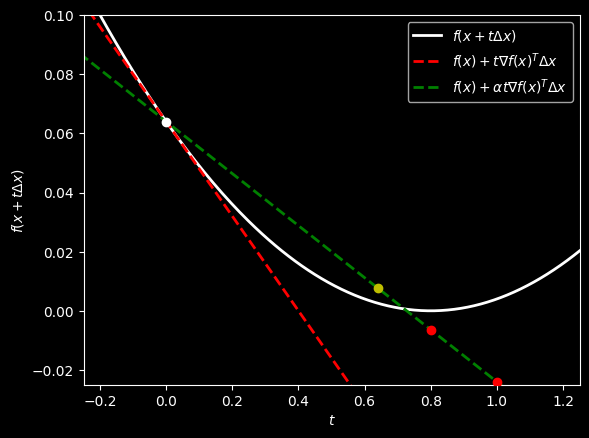

In [ ]:
def f(t):
    return 0.1 * (t-0.8) ** 2

def grad_f(t):
    return 0.2 * (t-0.8)

def lower_bound(x, t):
    return f(x) + t * grad_f(x)

def line_search(x, t, alpha):
    return f(x) + alpha * t * grad_f(x)

x = 0.
alpha = 0.55
beta= 0.8

t = np.linspace(-0.5, 1.5, 300)

plt.plot(t, f(t), label="$f(x+t\Delta x)$", color='w', linewidth=2)
plt.plot(t, lower_bound(x,t), label=r"$f(x)+t\nabla f(x)^T \Delta x$", color='r', ls='--', linewidth=2)
plt.plot(t, line_search(x,t, alpha), label=r"$f(x)+\alpha t\nabla f(x)^T \Delta x$", color='g', ls='--',linewidth=2)

plt.scatter(x, f(x), color='w', zorder=5)
plt.scatter(1, line_search(x, 1, alpha), color='r', zorder=5)
plt.scatter(0.8, line_search(x, 0.8, alpha), color='r', zorder=5)
plt.scatter(0.64, line_search(x, 0.64, alpha), color='y', zorder=5)

plt.xlabel("$t$")
plt.ylabel("$f(x+t\Delta x)$")
plt.ylim(-0.025, 0.1)
plt.xlim(-0.25, 1.25)
plt.legend()
plt.show()

Line search reduces the problem to a 1D function of $t$ ($x$ and $\Delta x$ are fixed for this iteration) so we can plot it as shown above (iteration index $k$ is omitted for clarity)

The ideal case would be solving the following `exact line search` problem

$$t= \arg \min_{t>0} f(x+t\Delta x)$$

However, `empirical` approach often works just as well, for example `backtracking line search`

The idea is to first choose parameters $\alpha$ and $\beta$, commonly in $(0, 1)$ and do the following

* Starting at $t=1$, repeat $t=\beta t$ until

$$f(x+t\Delta x)<f(x)+\alpha t \nabla f(x)^T\Delta x$$

Based on 1st order condition for convex function, this inequality would `never` hold if $\alpha=1$

This is because the right hand side would be just $f(x)+t \nabla f(x)^T\Delta x$, which is a `lower bound` (red line) of $f(x+t\Delta x)$

So, the only way that the inequality hold is to

* lower the slope (green line) by parameter $\alpha$, and
* reduce $t$ with parameter $\beta$

For example, in the figure, we start with step size $t=1$ and see that after two iterations and we get to $t=0.8\times0.8 =0.64$, the following holds

$$f(x+t\Delta x)<f(x)+\alpha t \nabla f(x)^T\Delta x$$

and we choose `step size` $t=0.64$ for this iteration of descent

#### `Gradient descent` and 1st order approximation

Iteratively minimize 1st order Taylor approximation of $f: \mathbf{R}^n \rightarrow \mathbf{R}$

$$f(x)\approx f(x_0)+\nabla f(x_0)^T(x-x_0)$$

The idea is to minimize $f(x)$ while not moving too far away from $x_0$

Therefore, we have the `objective function` at iteration $k$ as

$$x^{k+1}=\arg \min_xf(x^{k})+\nabla f(x^{k})^T(x-x^{k})+\frac{1}{2t^k}\|x-x^{k}\|_2^2$$

We take derivative of the objective function and set it to zero

$$0+\nabla f(x^{k})+\frac{1}{t^k}(x-x^{k})=0$$

and we get the gradient descent equation

$$x^{k+1}=x^{k}-t^k \nabla f(x^{k})$$

which
* choose search direction $\boxed{\Delta x^k = -\nabla f(x^k)}$
* find step size $t^k$ through line search

#### Gradient descent with `ill-conditioned` problem

Consider 100-smooth and 1-strongly convext function

$$f(x)=\frac{1}{2}x^T Q x, Q=\begin{bmatrix}100& 0 \\ 0 & 1\end{bmatrix}\, \rightarrow \kappa=100$$

Since the `Hessian` $\nabla^2f(x)$ is just $Q$, we can verify the smoothness and strong convexity parameter by  the largest and smallest eigenvalues of $Q$

The function's sublevel sets are `ellipsoids` that are very thin along $x_1$ and very extended along $x_2$

The mininum value is at $\begin{bmatrix}0 \\ 0\end{bmatrix}$

For this problem, assume we have initial guess at $x^0=\begin{bmatrix}0.01 \\ 1\end{bmatrix}$ and we work out our `search direction ` for gradient descent

$$\Delta x^0=-\nabla f(x)|_{x=x^0}=-Qx^0=-\begin{bmatrix}1 \\ 1\end{bmatrix}$$

Immediately, we see the negative gradient direction is not even remotely pointing to the origin...

We then use exact line search to work out `step size`

$$\begin{align*}t^0 &= \arg \min_{t>0} f(x^0+t\Delta x^0)\\
&= \arg \min_{t>0} \frac{1}{2}\begin{bmatrix}0.01-t \\ 1-t\end{bmatrix}^T\begin{bmatrix}100& 0 \\ 0 & 1\end{bmatrix}\begin{bmatrix}0.01-t \\ 1-t\end{bmatrix}\\
&=\arg \min_{t>0} \frac{1}{2}\left(100(0.01-t)^2+(1-t)^2\right)
\end{align*}$$

Take derivative and set to zero, we have

$$200(t-0.01)+2(t-1)=0 \Rightarrow t^0=\frac{2}{101}$$

Plug into gradient descent

$$\begin{align*}
x^1&=x^0-\frac{2}{101}Qx^0 \\
&=x^0\left(I-\frac{2}{101}Q\right) \\
&=\begin{bmatrix}0.01\cdot\frac{-99}{101} \\ 1\cdot\frac{99}{101}\end{bmatrix} \\
&\approx \begin{bmatrix}-0.01 \\ 0.98\end{bmatrix}
\end{align*}$$

We see that $x^1$ barely moves closer to mininum, and it overshoots in $x_1$ direction

#### `Convergence analysis` for smooth and strongly convex functions

We can also assess `general` convergence behavior of gradient descent with smooth and strongly convex functions

Recall `co-coercivity` of $M$-`smooth` and `convex` function

$$\langle \nabla f(x) - \nabla f(y), x-y \rangle \geq \frac{1}{M}\|\nabla f(x)-\nabla f(y)\|_2^2$$

Let $f$ also be $m$-`strongly convex`, by definition, the following function is `convex`

$$f(x)-\frac{m}{2}\|x\|_2^2$$

In addition

$$\frac{M-m}{2}\|x\|_2^2-\left(f(x)-\frac{m}{2}\|x\|_2^2\right)=\frac{M}{2}\|x\|_2^2-f(x)$$

which is `convex` due to $M$-`smoothness` of $f$

Therefore, by definition

$$f(x)-\frac{m}{2}\|x\|_2^2$$

is also a $(M-m)$-`smooth function`

We apply co-coercivity to $f(x)-\frac{m}{2}\|x\|_2^2$ to get

$$\langle \nabla f(x) - \nabla f(y) - m(x-y), x-y \rangle \geq \frac{1}{M-m}\|\nabla f(x)-\nabla f(y)- m(x-y)\|_2^2$$

Split and rearrange...

$$\begin{align*}&\langle \nabla f(x) - \nabla f(y) - m(x-y), x-y \rangle \\
& =\langle \nabla f(x) - \nabla f(y) , x-y \rangle - \langle m(x-y) , x-y \rangle \\
&= \langle \nabla f(x) - \nabla f(y) , x-y \rangle - m \| x-y \|_2^2 \\
& \text{now right hand side...} \\
& \geq \frac{1}{M-m}\|\nabla f(x)-\nabla f(y)\|_2^2 +\frac{m^2}{M-m} \|x-y\|_2^2 -\frac{2m}{M-m}  \langle \nabla f(x) - \nabla f(y) , x-y \rangle
\end{align*}$$

Rearrange...

$$\langle \nabla f(x) - \nabla f(y), x-y \rangle +\frac{2m}{M-m}\langle \nabla f(x) - \nabla f(y), x-y \rangle\\
\geq m\|x-y\|_2^2+\frac{1}{M-m}\|\nabla f(x) - \nabla f(y)\|_2^2+\frac{m^2}{M-m}\|x-y\|_2^2$$

Simplify...

$$\frac{M+m}{M-m}\langle \nabla f(x) - \nabla f(y), x-y \rangle\geq \frac{Mm}{M-m}\|x-y\|_2^2+\frac{1}{M-m}\|\nabla f(x) - \nabla f(y)\|_2^2$$

or

$$\langle \nabla f(x) - \nabla f(y), x-y \rangle\geq \frac{mM}{m+M}\|x-y\|_2^2+\frac{1}{m+M}\| \nabla f(x) - \nabla f(y)\|_2^2$$

which looks like `coercivity` (bounded by difference in variable values) combined with `co-coercivity` (bounded by difference in gradients)

For gradient descent, if we choose `step size` $t=\frac{2}{m+M}$ (in the example above, we have $t=\frac{2}{m+M}=\frac{2}{101}$)

$$x^{k+1}=x^k-t\nabla f(x^k)$$

and

$$\begin{align*}
\|x^{k+1}-x^*\|_2^2&=\|x^k-t\nabla f(x^k)-x^*\|_2^2 \\
&=\|x^k-x^*\|_2^2-2t\langle \nabla f(x^k), x^k-x^*\rangle +t^2\|\nabla f(x^k)\|_2^2 \\
& \nabla f(x^*)=0 \\
&=\|x^k-x^*\|_2^2-2t\langle \nabla f(x^k)-\nabla f(x^*), x^k-x^*\rangle +t^2\|\nabla f(x^k)\|_2^2 \\
&\langle \nabla f(x) - \nabla f(y), x-y \rangle\geq \frac{mM}{m+M}\|x-y\|_2^2+\frac{1}{m+M}\| \nabla f(x) - \nabla f(y)\|_2^2 \\
&\leq \left(1-2t\frac{mM}{m+M}\right)\|x^k-x^*\|_2^2 + \left(t^2-2t\frac{1}{m+M}\right)\|\nabla f(x^k)\|_2^2 \\
& t = \frac{2}{m+M} \Rightarrow t^2-2t\frac{1}{m+M}= 0 \\
&= \left(1-2t\frac{mM}{m+M}\right)\|x^k-x^*\|_2^2 \\
&= \left(1-\frac{4mM}{(m+M)^2}\right)\|x^k-x^*\|_2^2 \\
&= \frac{(m-M)^2}{(m+M)^2}\|x^k-x^*\|_2^2 \\
&= \left(\frac{M/m-1}{M/m+1}\right)^2\|x^k-x^*\|_2^2\\
&= \boxed{\left(\frac{\kappa-1}{\kappa+1}\right)^2\|x^k-x^*\|_2^2}\\
\end{align*}$$

This is sort of where the number $\frac{99}{101}$ in the example comes from

We can imagine that as $\kappa$ gets moderately large, gradient descent becomes so slow that it is practically useless...

#### `Steepest descent` method

Recall that for gradient descent, if we set step size $t^k=1$, we can find the optimal `search direction` $\Delta x$ by solving a regularized minimization of 1st Taylor approximation of the function at $x^k$

$$\begin{align*}\Delta x^k&=\arg \min_{v}f(x^{k})+\nabla f(x^{k})^Tv+\frac{1}{2}\|v\|_2^2 \\
&=\arg \min_{v} \nabla f(x^{k})^Tv+\frac{1}{2}\|v\|_2^2 \\
& = -\nabla f(x^k)
\end{align*}$$

Here, the term $\frac{1}{2}\|v\|_2^2$ constrains the solution to be `not too far away` from $x^k$, as measured by the $l_2$ norm

##### Search direction under `arbitrary norm`

But what if $v$ is measured by some `arbitrary norm`?

The solution is known as the (unnormalized) steepest descent, or `sd` direction

$$\boxed{\Delta x_{sd}=\arg \min_v \nabla f(x)^Tv+\frac{1}{2}\|v\|^2 }$$

Let $v=sw$, where

* $s>0$ is the scaling factor
* $w$ is a unit vector measured by this arbitrary norm, $\|w\|=1$, representing the search direction

We first minimize over $s$ with the objective

$$s\nabla f(x)^T w+\frac{s^2}{2}$$

We take the derivative and set to zero

$$\nabla f(x)^Tw+s=0 \Rightarrow s=-\nabla f(x)^Tw$$

Plug $s$ back to the objective, we have

$$-(\nabla f(x)^Tw)^2 +\frac{1}{2}(\nabla f(x)^Tw)^2=-\frac{1}{2}(\nabla f(x)^Tw)^2$$

and minimizing over $w$ is equivalent to

$$\begin{align*}w&=\arg \min_{\|w\|=1} -\frac{1}{2}(\nabla f(x)^Tw)^2 \\
&=\arg \max_{\|w\|=1} |\nabla f(x)^Tw|
\end{align*}$$

Recall the definition of `dual norm`

$$\begin{align*}
\|\nabla f(x)\|_* &= \sup_{\|w\|=1} \nabla f(x)^Tw \\
& \text{symmetry of norm} \\
&= \sup_{\|w\|=1} |\nabla f(x)^Tw| \\
\end{align*}$$

Therefore, the solution $w$ satisfies $|\nabla f(x)^Tw|=\|\nabla f(x)\|_*$

`Note`, here we need to use the definition based on absolute value to be consistent with optimization of $w$

Since $s=-\nabla f(x)^Tw>0$, therefore

$$|\nabla f(x)^Tw|=-\nabla f(x)^Tw=\boxed{s=\|\nabla f(x)\|_*}$$

Naturally we can let this $w$ be the `normalized` steepest descent search direction $\Delta x_{nsd}$, and we have the relationship between $\Delta x_{sd}$ and $\Delta x_{nsd}$

$$\Delta x_{sd}=\|\nabla f(x)\|_*\Delta x_{nsd}$$

##### `Quadratic` norm search direction

For the quadratic norm defined as

$$\|v\|_P=(v^TPv)^{1/2}, P\in S^n_{++}$$

we can write out the steepest descent problem

$$\Delta x_{sd}=\arg \min_v \nabla f(x)^Tv+\frac{1}{2}v^TPv $$

Notice that we can write the quadratic norm as Euclidean norm

$$\begin{align*}\|v\|_P&=(v^TPv)^{1/2}=\|P^{1/2}v\|_2
\end{align*}$$

Therefore, we can transform the problem into what we are familiar with by letting

$$z=P^{1/2}v$$

and we have

$$\Delta z_{sd}=\arg \min_z \nabla f(x)^TP^{-1/2}z+\frac{1}{2}\|z\|_2^2 $$

Take derivative w.r.t. $z$ and set to zero, we have

$$P^{-1/2}\nabla f(x)+z=0 \Rightarrow \Delta z_{sd}=-P^{-1/2}\nabla f(x)$$

Convert back

$$\begin{align*}\Delta x_{sd}&=P^{-1/2}\Delta z_{sd} \\
& = \boxed{P^{-1}\left(-\nabla f(x)\right)}
\end{align*}$$

##### `Geometric` interpretation

From the expression, we see that the direction of gradient descent is transformed by $P^{-1}$

To see where the direction is `after transformation`, we can write eigendecomposition of $P^{-1}$ as

$$P=Q\Lambda Q^T\Rightarrow P^{-1}=Q\Lambda ^{-1}Q^T$$

Therefore, the component of $-\nabla f(x)$ will be stretched by $\lambda_i^{-1}$ in the `direction of the eigenvector` $q_i$ of $P$

To visualize these directions, recall that the semiaxes for the ellipsoid

$$\{x|x^TPx\leq 1\}$$

is given by $\lambda_i^{-1/2}q_i$

As a result, geometrically, we can think of placing $-\nabla f(x)$ at the center of the ellipoid $\{x|x^TPx\leq 1\}$, and stretch it along each semiaxis direction by the amount that equals the `length of semiaxis squared`

More generally, if we look at the optimization to get $w$ or $\Delta x_{nsd}$

$$\begin{align*}w&=\arg \min_{\|w\|=1} -\frac{1}{2}(\nabla f(x)^Tw)^2 \\
&=\arg \max_{\|w\|=1} |\nabla f(x)^Tw| \\
\end{align*}$$

Therefore, the `sublevel` sets of the objective function is just parallel hyperplanes perpendicular to $\nabla f(x)$, with its value increase in both $-\nabla f(x)$ and $\nabla f(x)$ directions. However, since we require $\nabla f(x)^Tw<0$, we only focus on the $-\nabla f(x)$ direction

Now, with the unit ball constaint, we can consider finding the normalized search direction $\Delta_{nsd}$ as moving gradually a hyperplane from far away in the $-\nabla f(x)$ direction towards the unit ball $\|w\|=1$ until the first touch which gives $\Delta_{nsd}$